# Exam #3 - Fall 19' - Q2 - Cross Validation

In this question, you will use NBA rookie stats to predict if player will last 5 years in league

In [2]:
%matplotlib inline
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
import pylab
from matplotlib import mlab
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn import  model_selection
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
import pandas as pd

from sklearn.metrics import classification_report


## Open the NBA dataset (attahced) and explore it lightly. The data dictionary is attached as well

In [3]:
# your code here
df_nba = pd.read_csv('nba.csv')
df = df_nba.copy()

In [6]:
df.head()

Name  GP   MIN  PTS  FGM  FGA   FG%  3P Made  3PA  FTM  FTA  \
0   Brandon Ingram  36  27.4  7.4  2.6  7.6  34.7      0.5  2.1  1.6  2.3   
1  Andrew Harrison  35  26.9  7.2  2.0  6.7  29.6      0.7  2.8  2.6  3.4   
2   JaKarr Sampson  74  15.3  5.2  2.0  4.7  42.2      0.4  1.7  0.9  1.3   
3      Malik Sealy  58  11.6  5.7  2.3  5.5  42.6      0.1  0.5  0.9  1.3   
4      Matt Geiger  48  11.5  4.5  1.6  3.0  52.4      0.0  0.1  1.3  1.9   

    FT%  OREB  DREB  REB  AST  STL  BLK  TOV  TARGET_5Yrs  
0  69.9   0.7   3.4  4.1  1.9  0.4  0.4  1.3          0.0  
1  76.5   0.5   2.0  2.4  3.7  1.1  0.5  1.6          0.0  
2  67.0   0.5   1.7  2.2  1.0  0.5  0.3  1.0          0.0  
3  68.9   1.0   0.9  1.9  0.8  0.6  0.1  1.0          1.0  
4  67.4   1.0   1.5  2.5  0.3  0.3  0.4  0.8          1.0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 20 columns):
Name           1340 non-null object
GP             1340 non-null int64
MIN            1340 non-null float64
PTS            1340 non-null float64
FGM            1340 non-null float64
FGA            1340 non-null float64
FG%            1340 non-null float64
3P Made        1340 non-null float64
3PA            1340 non-null float64
FTM            1340 non-null float64
FTA            1340 non-null float64
FT%            1340 non-null float64
OREB           1340 non-null float64
DREB           1340 non-null float64
REB            1340 non-null float64
AST            1340 non-null float64
STL            1340 non-null float64
BLK            1340 non-null float64
TOV            1340 non-null float64
TARGET_5Yrs    1340 non-null float64
dtypes: float64(18), int64(1), object(1)
memory usage: 209.5+ KB


In [8]:
df.describe()

GP          MIN          PTS          FGM          FGA  \
count  1340.000000  1340.000000  1340.000000  1340.000000  1340.000000   
mean     60.414179    17.624627     6.801493     2.629104     5.885299   
std      17.433992     8.307964     4.357545     1.683555     3.593488   
min      11.000000     3.100000     0.700000     0.300000     0.800000   
25%      47.000000    10.875000     3.700000     1.400000     3.300000   
50%      63.000000    16.100000     5.550000     2.100000     4.800000   
75%      77.000000    22.900000     8.800000     3.400000     7.500000   
max      82.000000    40.900000    28.200000    10.200000    19.800000   

               FG%      3P Made          3PA          FTM          FTA  \
count  1340.000000  1340.000000  1340.000000  1340.000000  1340.000000   
mean     44.169403     0.247612     0.779179     1.297687     1.821940   
std       6.137679     0.383688     1.061847     0.987246     1.322984   
min      23.800000     0.000000     0.000000     0.000000     0.000000   
25%      40.200000     0.000000     0.000000     0.600000     0.900000   
50%      44.100000     0.100000     0.300000     1.000000     1.500000   
75%      47.900000     0.400000     1.200000     1.600000     2.300000   
max      73.700000     2.300000     6.500000     7.700000    10.200000   

               FT%         OREB         DREB          REB          AST  \
count  1340.000000  1340.000000  1340.000000  1340.000000  1340.000000   
mean     70.300299     1.009403     2.025746     3.034478     1.550522   
std      10.578479     0.777119     1.360008     2.057774     1.471169   
min       0.000000     0.000000     0.200000     0.300000     0.000000   
25%      64.700000     0.400000     1.000000     1.500000     0.600000   
50%      71.250000     0.800000     1.700000     2.500000     1.100000   
75%      77.600000     1.400000     2.600000     4.000000     2.000000   
max     100.000000     5.300000     9.600000    13.900000    10.600000   

               STL          BLK          TOV  TARGET_5Yrs  
count  1340.000000  1340.000000  1340.000000  1340.000000  
mean      0.618507     0.368582     1.193582     0.620149  
std       0.409759     0.429049     0.722541     0.485531  
min       0.000000     0.000000     0.100000     0.000000  
25%       0.300000     0.100000     0.700000     0.000000  
50%       0.500000     0.200000     1.000000     1.000000  
75%       0.800000     0.500000     1.500000     1.000000  
max       2.500000     3.900000     4.400000     1.000000

- Balance of the target feature

Distribution of target feature
 1.0    831
0.0    509
Name: TARGET_5Yrs, dtype: int64


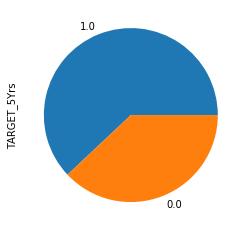

In [9]:
print('Distribution of target feature\n',df.TARGET_5Yrs.value_counts())
df.TARGET_5Yrs.value_counts().plot('pie');

- distribution of the features

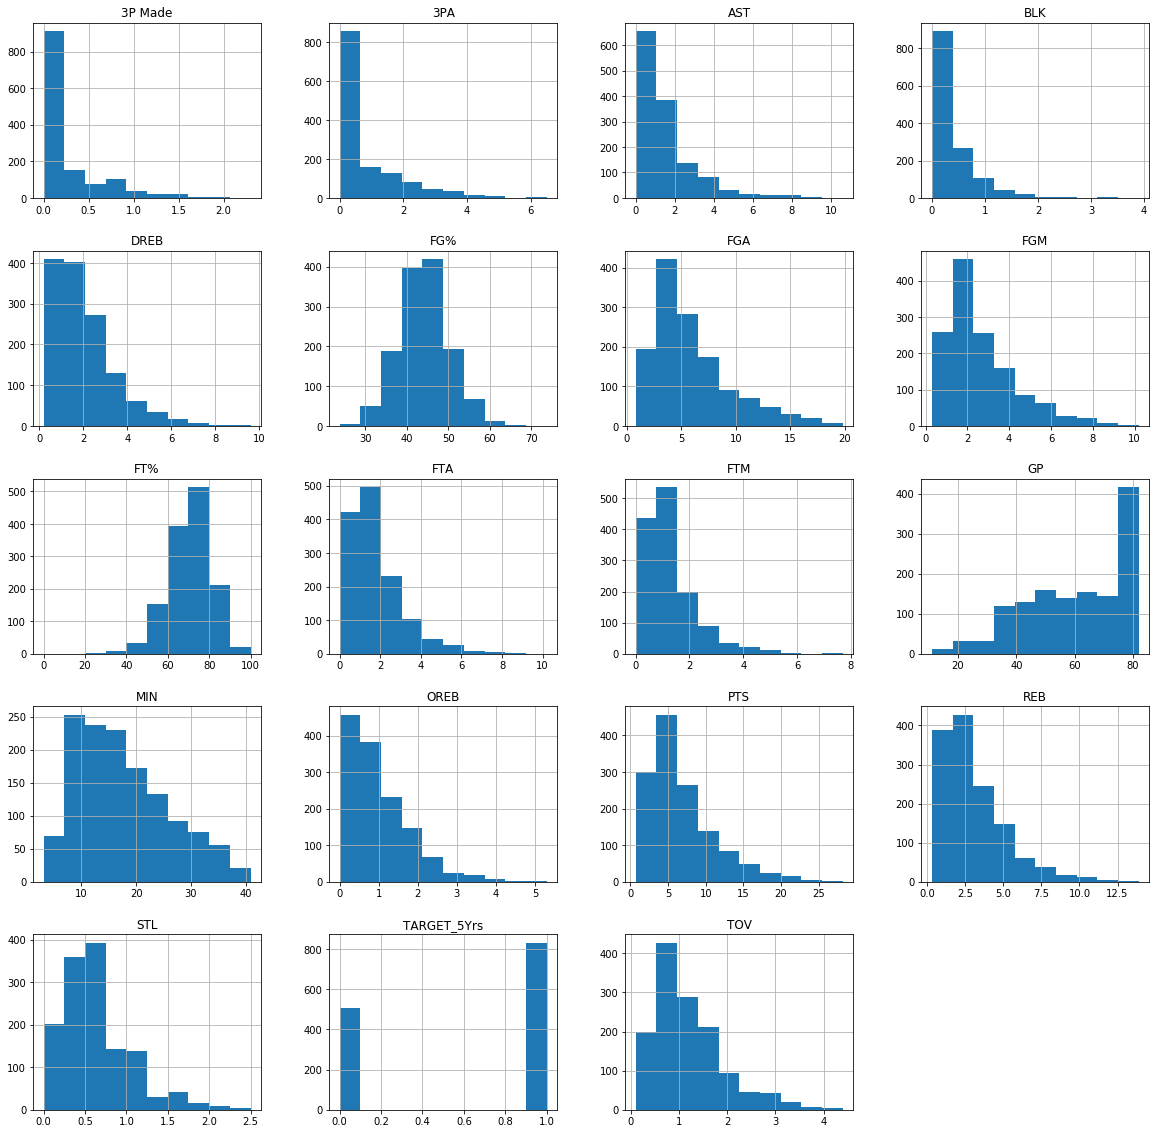

In [9]:
df.hist(figsize=(20,20))
plt.show()

- chech the dependency between the features

- my anaconda died on the last restart, so now we can't see the plots...

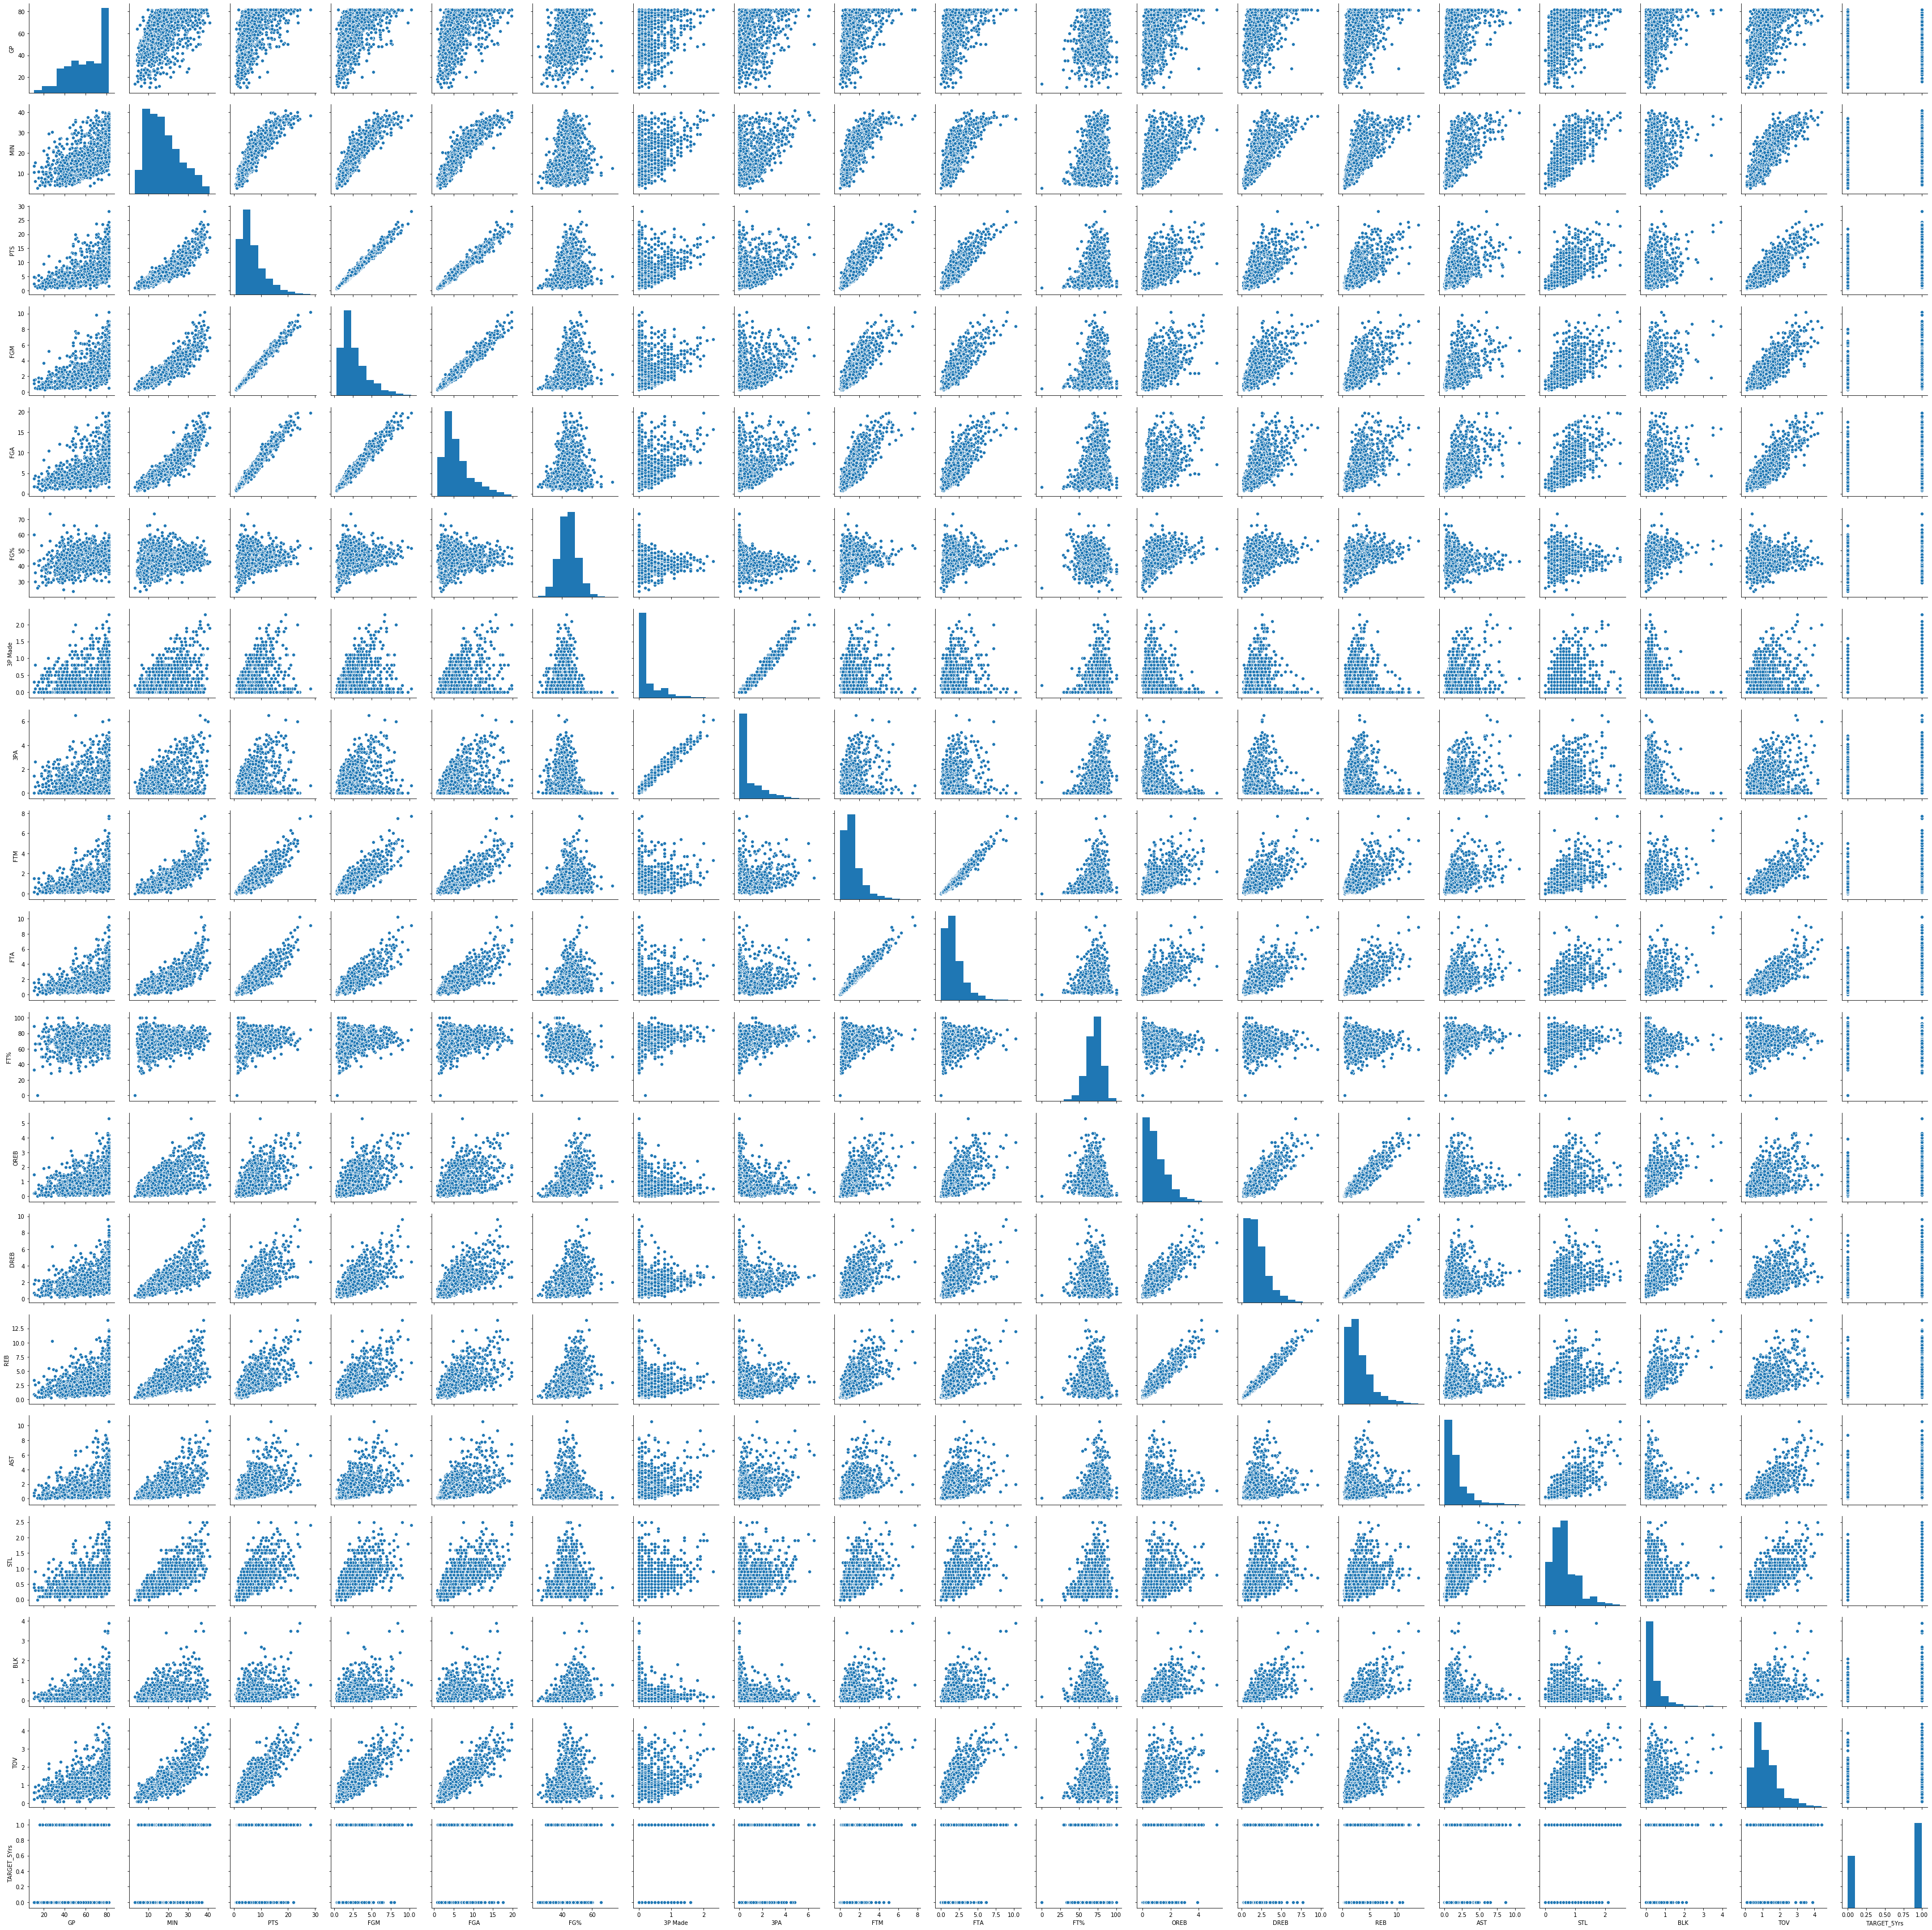

In [44]:
sns.pairplot(df, height=2.5);

## Prepare the data for a model of your choice, including mandatory preprocessing, and divide the data into a train and a test set. Explain your steps.

- I scaled the features before to train the model

In [10]:
y = df['TARGET_5Yrs']
X = df.drop(['TARGET_5Yrs', 'Name'], axis = 1)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


- And have a look on scaled features

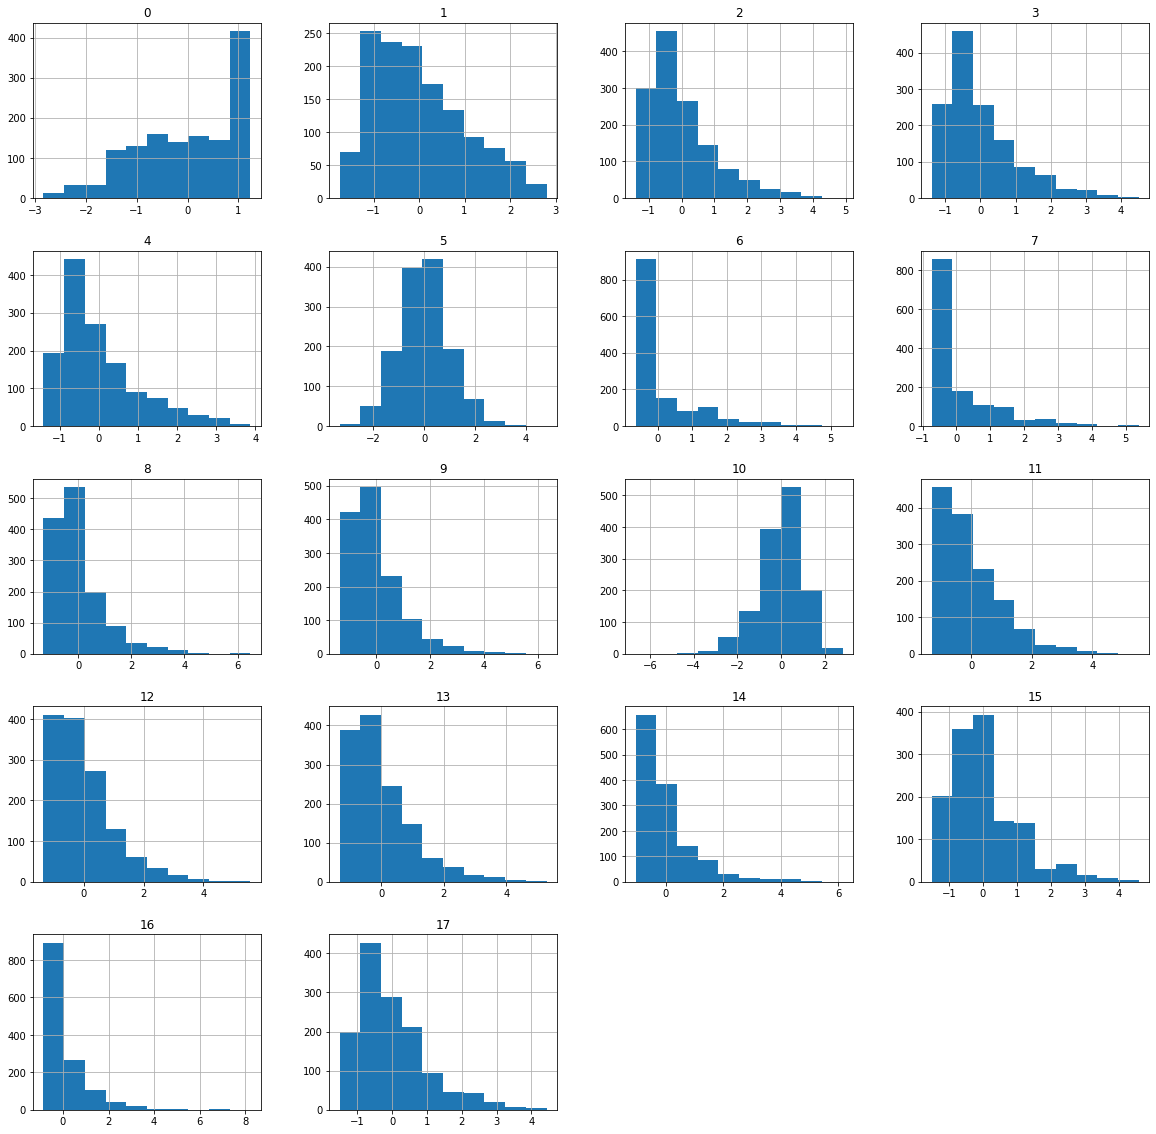

In [12]:
pd.DataFrame(X_scaled).hist(figsize=(20,20))
plt.show()

## Divide your dataset to a train set and a test set

In [13]:
# your code here
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.8)
len(X.columns)

18

## Train a model of your choice (NOT the same model from Q1), and predict on the test set

- I choose logistic regression,the most of the features are contionuous, we don't have too much features, so can try with something simple

In [17]:
# your code here
logreg = LogisticRegression(penalty = 'l2', solver = 'lbfgs', max_iter=100, random_state = 42)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Choose two metrics of evaluation, and evaluate your model. 
* Exlain the difference between the metrics
* Explain the advantages and disadvantages of each metric that your chose
* Present the result of prediction for both the train and test sets

- Actually we don't have any buisness task and I don't know what we need more for the task: to be precise or catch "all" true positive examples (precision or recall)
So I plot presicion-recall and AUC curves to show the ability of the model.

And  check F1-score for both classes to check the quality of prediction.


In [18]:
# your code here
def get_stats(model, x_test_input=X_test, y_test_input=y_test,
             x_train_inp=X_train, y_train_inp=y_train):
    y_pred = np.round(model.predict(x_test_input))
    y_pred_train = np.round(model.predict(x_train_inp))
    accuracy_test = accuracy_score(y_test_input, y_pred)
    accuracy_train = accuracy_score(y_train_inp, y_pred_train)
    print("Accuracy Train: {0}".format(round(accuracy_train, 3)))
    print("Accuracy Test: {0}".format(round(accuracy_test, 3)))
    print(classification_report(y_test_input, y_pred))

In [19]:
get_stats(logreg, x_test_input=X_test, y_test_input=y_test,
             x_train_inp=X_train, y_train_inp=y_train)

Accuracy Train: 0.757
Accuracy Test: 0.703
              precision    recall  f1-score   support

         0.0       0.62      0.59      0.60       410
         1.0       0.75      0.78      0.76       662

    accuracy                           0.70      1072
   macro avg       0.69      0.68      0.68      1072
weighted avg       0.70      0.70      0.70      1072



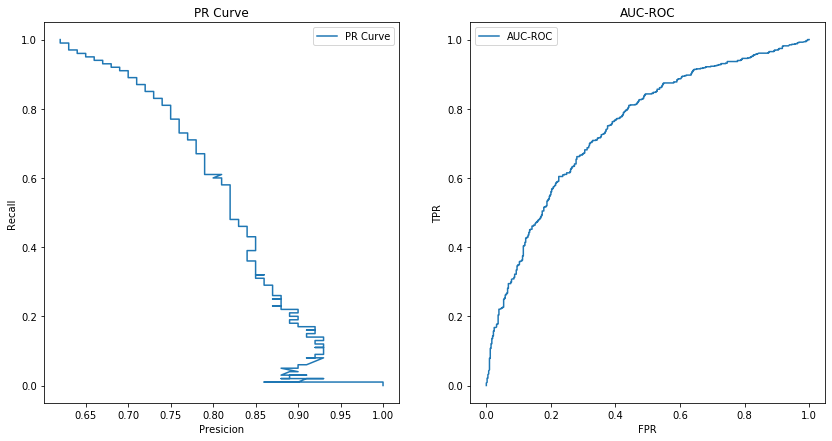

In [20]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

precision, recall, thresholds = precision_recall_curve(y_test,\
                                                       logreg.predict_proba(X_test)[:, 1])

precision, recall = np.round(precision, 2), np.round(recall, 2)
fpr, tpr, _ = roc_curve(y_test,logreg.predict_proba(X_test)[:, 1])

fig = plt.figure(figsize = (14,7))
ax1 = plt.subplot(121)
ax1.plot(precision, recall, label="PR Curve") 
plt.xlabel("Presicion")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.title('PR Curve')

ax2 = plt.subplot(122)
ax2.plot(fpr, tpr, label="AUC-ROC") 
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="best")
plt.title('AUC-ROC')
plt.show()

In [21]:
y_pred = logreg.predict(X_test)
f1_logreg = f1_score(y_test, y_pred, average='macro')

print("f1_score for the model", round(f1_logreg,2))

f1_score for the model 0.68


## Write a Cross-Validation class from scratch

* The class should get a `k` for no. of k-folds as input
* The class should contain a method that gets a dataset and creates the `k` splits to train and test.
* The class should contain a method that will use the model that you chose in the previous clauses, and run that model with one fold (the model should train on the train set and return a prediction vector for the test set)
* The class should have a method that trains in cross-validation and returns the score of the best model (1 of the metrics you chose in previous clauses)

- I tried to implement Cross-validation, but don't have enough time to finish it. Just leave it here:)

In [22]:
# # your code here
# from random import randrange
# from copy import deepcopy
# def cross_validation_split(X, y, folds=5):
#     X_split = list()
#     y_split = list()
    
#     X_copy = deepcopy(list(X))
#     y_copy = deepcopy(list(y))
    
#     fold_size = int(len(X)/folds)
    
#     for i in range(folds):
#         fold_X = list()
#         fold_y = list()
#         while len(fold_X) < fold_size:
#             index = randrange(len(X_copy))
#             fold_X.append(X_copy.pop(index))
#             fold_y.append(y_copy.pop(index))
            
#         X_split.append(fold_X)
#         y_split.append(fold_y)
#     return X_split, y_split

In [23]:
# def cross_validation(data_X, data_y, k, folds = 5):
#     X_cross, y_cross = cross_validation_split(data_X, data_y, folds)
#     error_cross = []
#     for i in range(len(X_cross)):
#         X_test_list = X_cross[i]
#         X_train_list = X_cross[:i] + X_cross[i+1:]
#         X_train_cross = np.asarray([item for sublist in X_train_list for item in sublist])
#         X_test_cross = np.asarray(X_test_list)

#         y_test_list = y_cross[i]
#         y_train_list = y_cross[:i] + y_cross[i+1:]
#         y_train_cross = np.asarray([item for sublist in y_train_list for item in sublist])
#         y_test_cross = np.asarray(y_test_list)
        
        
#         y_pred_cross = logreg.predict(y_test_cross)
#         error = (y_pred_cross != y_test_cross).sum()
#         error_percentage = round(100*error/len(y_test_cross), 2)
#         error_cross.append(error_percentage)
#         error_mean = round(sum(error_cross) / len(error_cross), 3)
#     return error_mean
            

In [25]:

# cross_validation(X,y_train,5)

## Train a model, using the Cross-Validation class you have built

In [27]:


scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

kfold = model_selection.KFold(n_splits=10, random_state=42)
model=logreg

results = model_selection.cross_val_score(estimator=logreg,
                                          X=X_train,
                                          y=y_train,
                                          cv=5,
                                          scoring=make_scorer(f1_score))


No handles with labels found to put in legend.


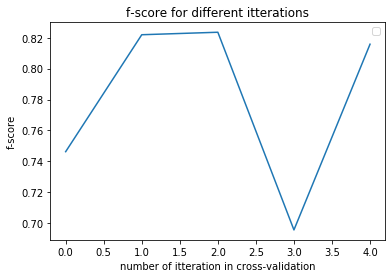

In [28]:
plt.plot(range(len(results)),results)

plt.xlabel("number of itteration in cross-validation")
plt.ylabel("f-score")
plt.legend(loc="best")
plt.title('f-score for different itterations')
plt.show()

## compare the results of the two models (with and without cross validation) - what are your conclusions?

- We have better results with cross validation. It means that test set is more complicated than train, so validation sets were easy to predict.

- For small sets we need to do cross-validation, otherways could have very random results, depends of how the data was splitted to train and test

In [29]:
y_pred = logreg.predict(X_test)
f1_logreg = f1_score(y_test, y_pred, average='macro')

In [30]:
print("f1_score for the model {},\nmean f1-score for cross-validation: {}".\
      format(round(f1_logreg,2), round(results.mean(),2)))

f1_score for the model 0.68,
mean f1-score for cross-validation: 0.78



## What is the baseline of this model? (Compute it and explain the choice), and compare it to your best model

baseline f1 for this model is the mean f1 score for cross-validation with the default parameters of the model.

Actually, in the end I have the same result for baseline model and for my model. So I need to tune the model better.

In [30]:
# your code here

logreg_baseline = LogisticRegression(random_state = 42)
logreg.fit(X_train, y_train)
y_red_baseline = logreg.predict(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=3000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
results_baseline = model_selection.cross_val_score(estimator=logreg_baseline,
                                          X=X_train,
                                          y=y_train,
                                          cv=kfold,
                                          scoring=make_scorer(f1_score))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [37]:
f1_baseline = results_baseline.mean()
print("f1_score for baseline model {}".format(round(f1_baseline,3)))

f1_score for baseline model 0.701
